In [1]:
#import needed libraries
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data user_day
df1=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_day.csv', encoding='utf-8-sig', engine='python')
df1.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse


In [3]:
#read the data user_cpi
df2=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_cpi.csv', encoding='utf-8-sig', engine='python')
df2.head()

,player_id,install_date,network_name,cpi,game
0,d4286141ab6790c14d251382eb097109,2019-08-02,Paid,0.26,My Lovely Horse
1,c16fc8f72badd29b315e7370fdf17dd3,2019-08-02,Organic,0.00,My Lovely Horse
2,ac5cbf1db218c7e4f3149c3318e62164,2019-08-02,Paid,0.26,My Lovely Horse
3,4fb68261bd7aa4750895aafd98db3920,2019-08-02,Paid,0.26,My Lovely Horse
4,d77e12b5b9117106c826fd094f7d6096,2019-08-02,Paid,0.26,My Lovely Horse


In [4]:
#merge the dataframes 
frames = [df1, df2]
df3= pd.merge(df1, df2, how="left", on=["player_id", "game"])
df3.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse,2019-09-15,Organic,0.00
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse,2019-08-02,Paid,0.26
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00


In [5]:
#select 'My Lovely Horse' game data
df4=df3.loc[df3['game'] == 'Wiz War']
df4.sample(5)

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
1893866,0c89f3b64be306e5ffc2f2c2b2986e23,2019-04-01,0.00,0.00,Wiz War,2019-03-25,Paid,5.55
1916059,ab64449da02f20476c475f2171beb5e3,2019-03-18,0.00,0.00,Wiz War,2019-03-18,Paid,7.82
2230761,7e89dd36e7442cffaa5e1047b1271aa6,2019-05-22,0.00,0.00,Wiz War,2019-03-21,Paid,1.12
2129670,81ce81d3b0d883cc1ce77d0c9426a193,2019-04-30,0.00,0.00,Wiz War,2019-04-28,Organic,0.00
2245352,9f334b0a3af6d25dbc731f2b3b00ec80,2019-05-17,0.00,0.00,Wiz War,2019-05-15,Paid,10.69


In [6]:
#check data type and size
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412700 entries, 1866515 to 2279214
Data columns (total 8 columns):
player_id           412700 non-null object
event_date          412700 non-null object
iap_revenue         412700 non-null float64
video_ad_revenue    412700 non-null float64
game                412700 non-null object
install_date        412700 non-null object
network_name        412700 non-null object
cpi                 412700 non-null float64
dtypes: float64(3), object(5)
memory usage: 28.3+ MB


In [7]:
#check numerical fields
df4.describe()

,iap_revenue,video_ad_revenue,cpi
count,"412,700.00","412,700.00","412,700.00"
mean,0.33,0.00,3.58
std,6.19,0.00,5.18
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,2.66
75%,0.00,0.00,4.99
max,"1,503.88",0.00,99.91


In [8]:
#check categorical fields
df4_categorical=df4.select_dtypes(include=['object']).copy()
print(df4_categorical.describe())

                               player_id  event_date     game install_date  \
count                             412700      412700   412700       412700   
unique                             78675          89        1           89   
top     b42d6f845d1d62ea395a634e424818ea  2019-03-31  Wiz War   2019-03-27   
freq                                  91       11090   412700        16838   

       network_name  
count        412700  
unique            2  
top            Paid  
freq         269635  


In [9]:
#create cohorts based on install_date 
grouped = df4.groupby(['install_date','event_date'])
cohorts = grouped.agg({'player_id': pd.Series.nunique})
cohorts.rename(columns={'player_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers
install_date event_date            
2019-03-01   2019-03-01        1331
             2019-03-02         497
             2019-03-03         366
             2019-03-04         307
             2019-03-05         275

In [10]:
#Create a `CohortPeriod` column, which is the Nth period based on the user's login date.
def cohort_period(df4):
    df4['CohortPeriod'] = np.arange(len(df4)) 
    return df4

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
install_date event_date                          
2019-03-01   2019-03-01        1331             0
             2019-03-02         497             1
             2019-03-03         366             2
             2019-03-04         307             3
             2019-03-05         275             4

In [11]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['install_date', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

install_date
2019-03-01    1331
2019-03-02     665
2019-03-03     890
2019-03-04     949
2019-03-05    1120
Name: TotalUsers, dtype: int64

In [12]:
cohorts['TotalUsers'].head()

install_date  CohortPeriod
2019-03-01    0               1331
              1                497
              2                366
              3                307
              4                275
Name: TotalUsers, dtype: int64

In [13]:
cohorts['TotalUsers'].unstack(1).head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
install_date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,"1,331.00",497.00,366.00,307.00,275.00,235.00,201.00,176.00,166.00,132.00,...,33.00,32.00,29.00,30.00,31.00,26.00,25.00,27.00,29.00,27.00
2019-03-02,665.00,245.00,170.00,132.00,116.00,94.00,80.00,74.00,75.00,72.00,...,15.00,8.00,10.00,14.00,11.00,11.00,9.00,12.00,11.00,nan
2019-03-03,890.00,342.00,231.00,166.00,140.00,99.00,98.00,84.00,100.00,90.00,...,13.00,11.00,10.00,10.00,13.00,13.00,12.00,12.00,nan,nan
2019-03-04,949.00,398.00,247.00,177.00,147.00,131.00,126.00,135.00,113.00,96.00,...,13.00,15.00,12.00,15.00,11.00,15.00,16.00,nan,nan,nan
2019-03-05,"1,120.00",424.00,245.00,166.00,160.00,141.00,149.00,142.00,122.00,90.00,...,19.00,22.00,16.00,21.00,22.00,23.00,nan,nan,nan,nan


In [14]:
#create user retention rates
user_retention = cohorts['TotalUsers'].unstack(1).divide(cohort_group_size, axis=0)
user_retention.head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
install_date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,1.00,0.37,0.27,0.23,0.21,0.18,0.15,0.13,0.12,0.10,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2019-03-02,1.00,0.37,0.26,0.20,0.17,0.14,0.12,0.11,0.11,0.11,...,0.02,0.01,0.02,0.02,0.02,0.02,0.01,0.02,0.02,nan
2019-03-03,1.00,0.38,0.26,0.19,0.16,0.11,0.11,0.09,0.11,0.10,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,nan,nan
2019-03-04,1.00,0.42,0.26,0.19,0.15,0.14,0.13,0.14,0.12,0.10,...,0.01,0.02,0.01,0.02,0.01,0.02,0.02,nan,nan,nan
2019-03-05,1.00,0.38,0.22,0.15,0.14,0.13,0.13,0.13,0.11,0.08,...,0.02,0.02,0.01,0.02,0.02,0.02,nan,nan,nan,nan


In [15]:
user_retention.to_excel (r'C:\Users\Snow\Desktop\sa_data_test\WizWar.xlsx', index = True, header=True)

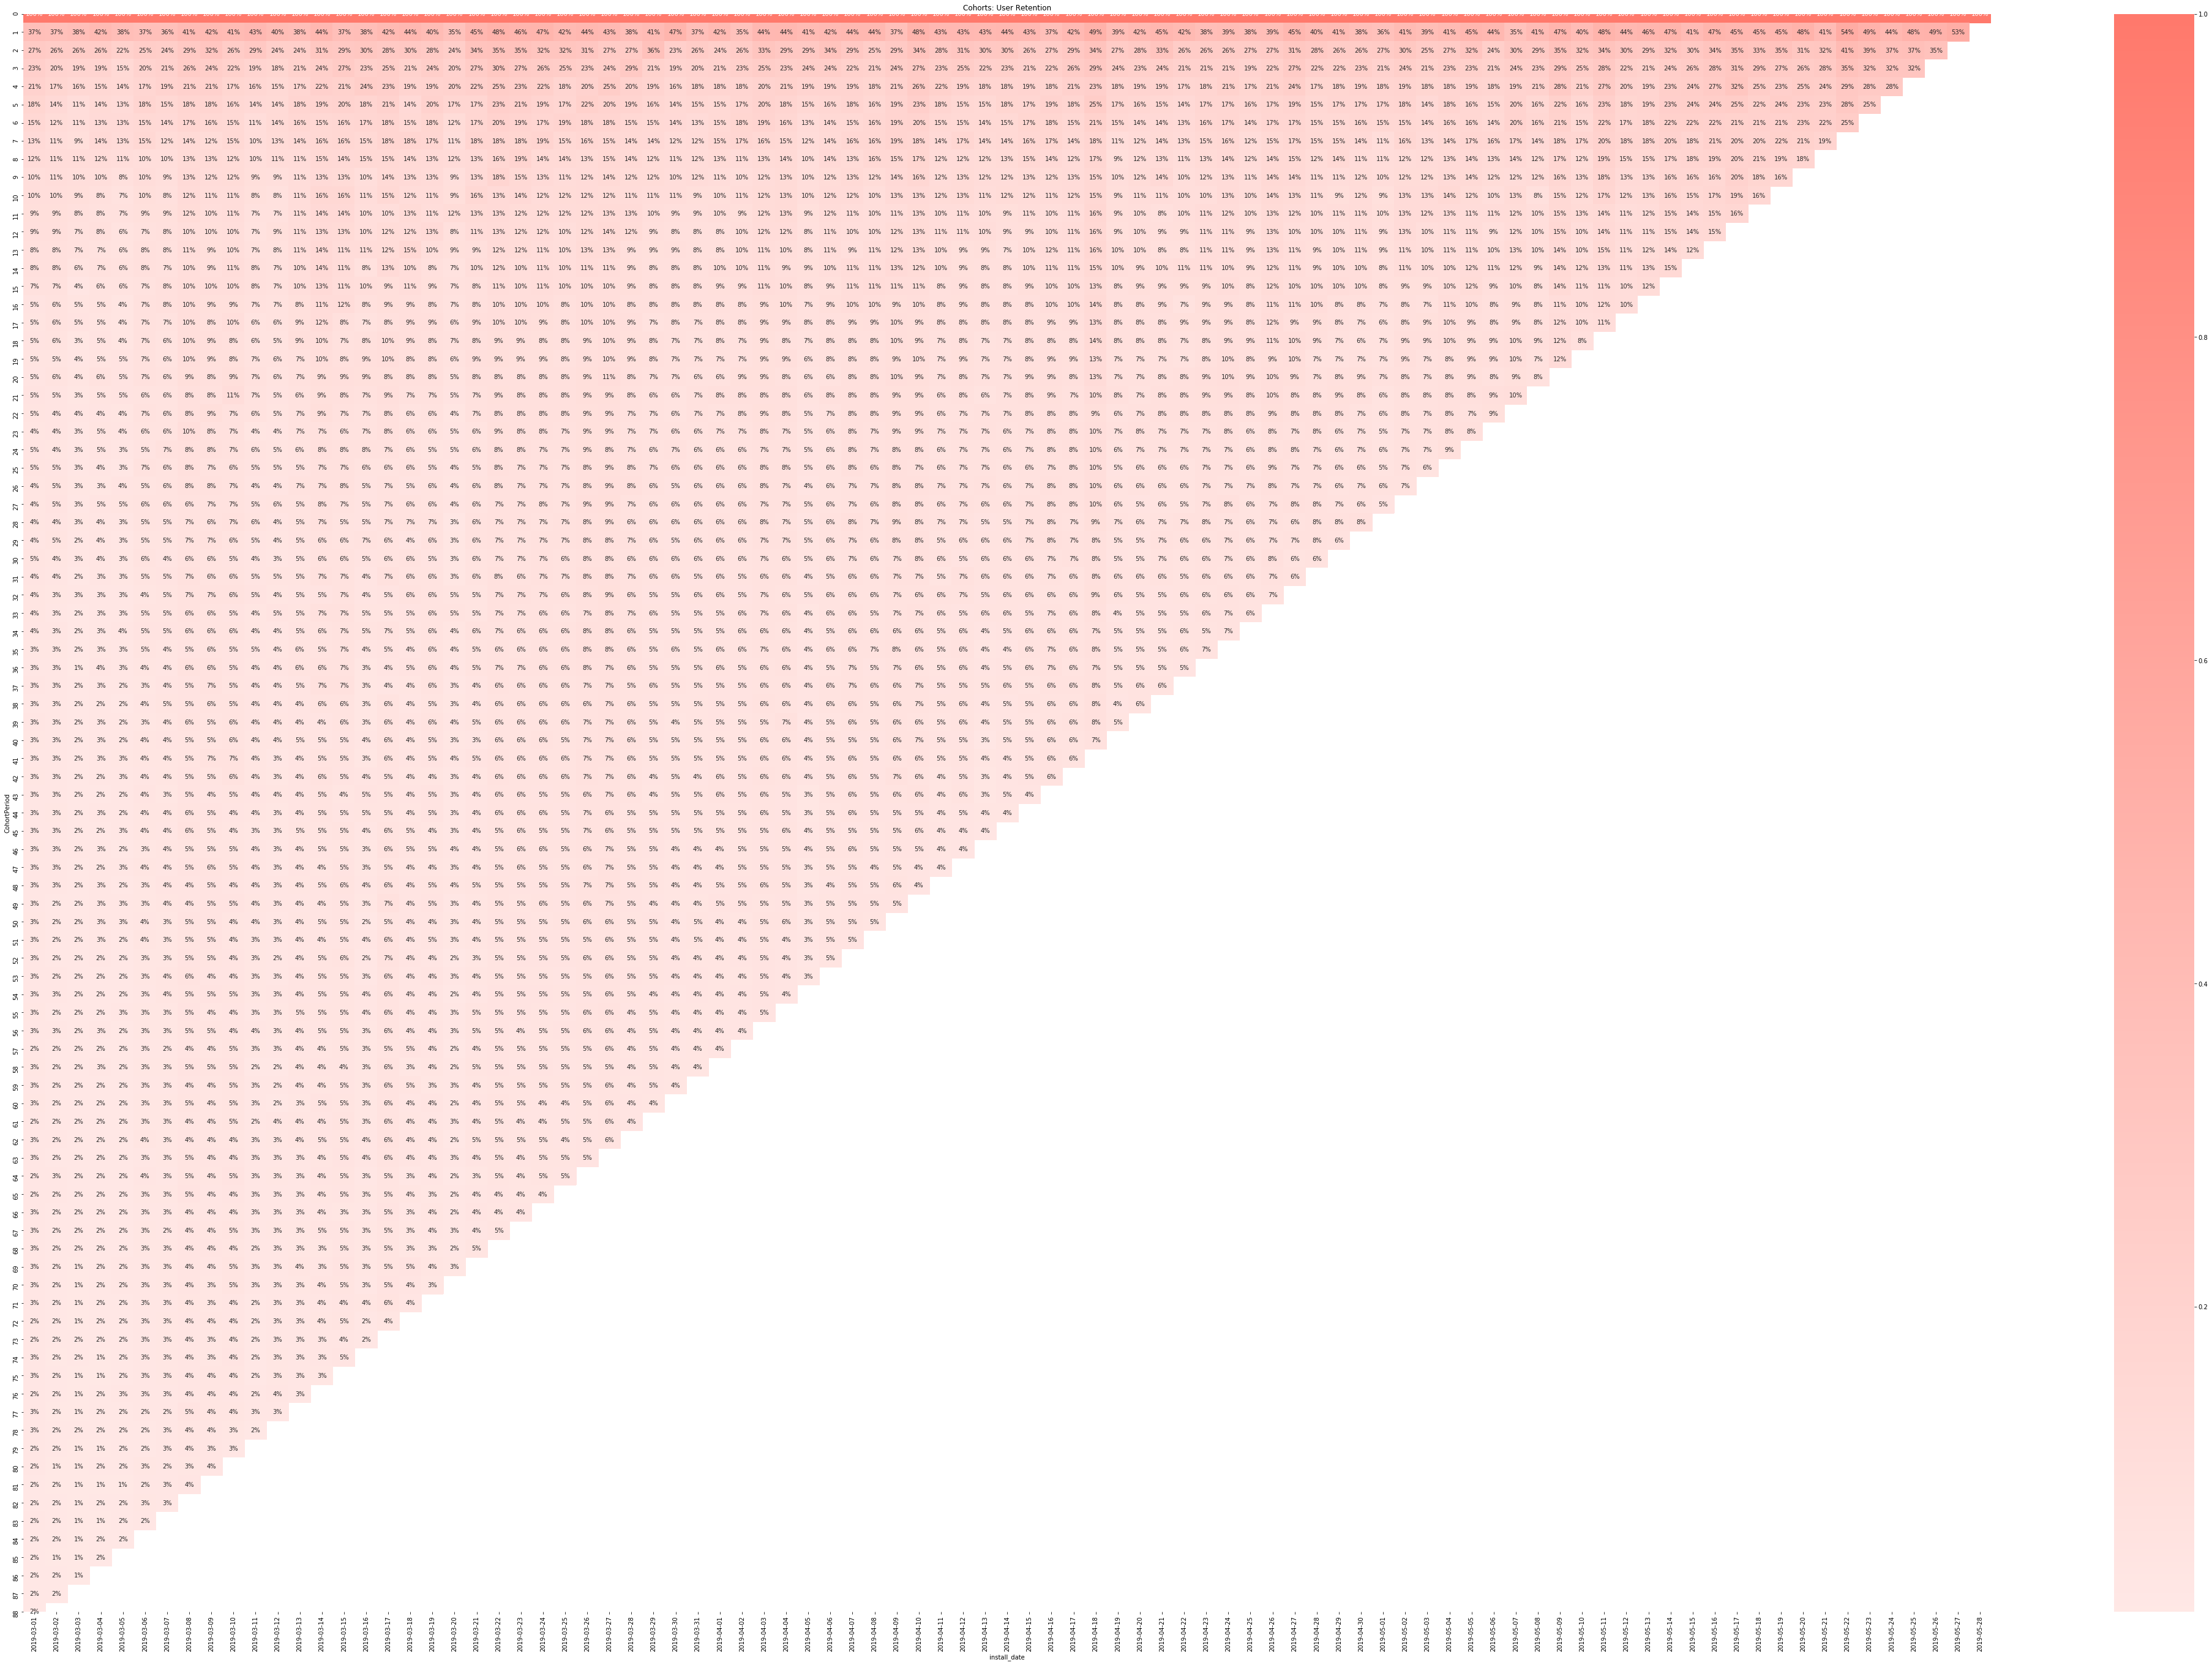

In [16]:
#show the retention rates
import seaborn as sns
colormap=sns.light_palette("#ff796c",as_cmap=True, reverse=False)

plt.figure(figsize=(72,48))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap=colormap);